## Суворов М. Д. Группа М8О-111М-21

### Вариант 27

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(42)

Обучающая выборка

In [3]:
X_train = np.array([
            np.array([-3.8, -4.8]),
            np.array([-2.1, -1.9]),
            np.array([1.5, 4.5]),
            np.array([4.3, -0.5]),
            np.array([-2.6, 2.6]),
            np.array([2.5, 2.4]),
])
y_train = np.array([1, 1, 1, 0, 1, 0]).reshape(-1,1)

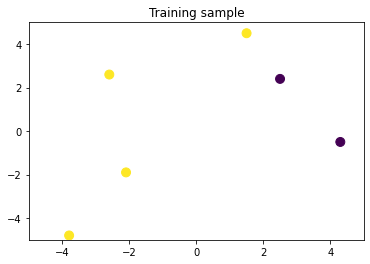

In [4]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, s=80)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.title('Training sample')
plt.show()

### 1.3 Алгоритм Розенблатта

In [5]:
class Perceptron():

    def __init__(self, activation):
        if activation == 'hardline':
            self.activation = self.hardline
        else:
            self.activation = self.hardline

    def train(self, X, y, n_iters=10000):
        n_samples, n_features = X.shape
        output_nodes = y.shape[1]

        # Инициализация весов
        self.weights = np.random.rand(n_features, output_nodes)
        self.bias = np.random.randn(output_nodes)
        print(self.weights)
        print(self.bias)

        for i in range(n_iters):
            # Расчёт выхода
            a = np.dot(X, self.weights) + self.bias

            y_predict = self.activation(a)

            # Расчёт поправок
            costs = y - y_predict
            delta_w = np.dot(X.T, costs)
            delta_b = costs

            # Обновление весов
            self.weights += delta_w
            self.bias += delta_b.sum(axis=0)

        return self.weights, self.bias


    def hardline(self, x):
#         res = []
#         for i in x:
#             tmp = []
#             for j in i:
#                 if j >= 0:
#                     tmp.append(1)
#                 else:
#                     tmp.append(0)
#             res.append(tmp)
#         return res
        return np.vectorize(lambda s: 1 if s >= 0 else 0)(x)
    
    def predict(self, X):
        a = np.dot(X, self.weights) + self.bias
        return self.activation(a)

In [6]:
p = Perceptron('hardline')
w, b = p.train(X_train, y_train)

[[0.37454012]
 [0.95071431]]
[0.64768854]


Полученные веса и смещение

In [7]:
w

array([[-7.82545988],
       [ 5.85071431]])

In [8]:
b

array([3.64768854])

### 1.3.3 Обучающая выборка и дискриминантная линия

In [9]:
def plot_hyperplane(X, y, weights, bias):
    """
    Plots the dataset and the estimated decision hyperplane
    """
    slope = - weights[0] / weights[1]
    intercept = - bias / weights[1]
    x_hyperplane = np.linspace(-10,10,10)
    y_hyperplane = slope * x_hyperplane + intercept
    fig = plt.figure(figsize=(8,6))
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.plot(x_hyperplane, y_hyperplane, '-')
    plt.title("Dataset and fitted decision hyperplane")
    plt.xlabel("First feature")
    plt.ylabel("Second feature")
    plt.grid()
    plt.xlim(-5,5)
    plt.ylim(-5,5)

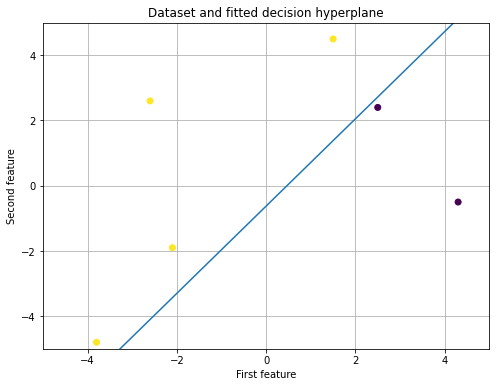

In [10]:
plot_hyperplane(X_train, y_train, w, b)

In [11]:
y_train_preds = p.predict(X_train)
print("training accuracy: %.2f" %(100 - np.mean(np.abs(y_train_preds - y_train)) * 100))

training accuracy: 100.00


Тестовые данные

In [12]:
X_test = np.random.randint(-4.5, 4.5, (4, 2))
X_test

array([[ 2, -3],
       [-2,  2],
       [-2, -2],
       [ 3,  0]])

In [13]:
y_test_preds = p.predict(X_test)
print(y_test_preds)

[[0]
 [1]
 [1]
 [0]]


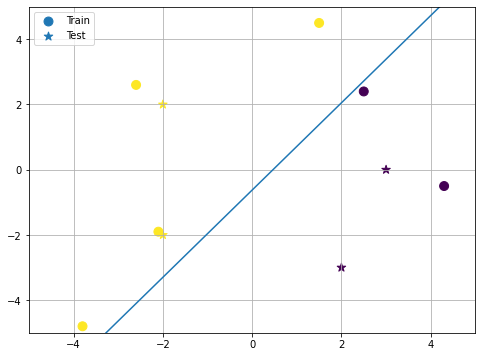

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, label='Train', s=80)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test_preds, label='Test', marker='*', s=80)
slope = - w[0] / w[1]
intercept = - b / w[1]
x_hyperplane = np.linspace(-10,10,10)
y_hyperplane = slope * x_hyperplane + intercept
plt.plot(x_hyperplane, y_hyperplane, '-')
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.grid()
plt.legend()
plt.show()

### 2. Линейно неразделимое множество. XOR-операция

In [15]:
inputs = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1],
])
output = np.array([0,1,1,0]).reshape(-1,1)

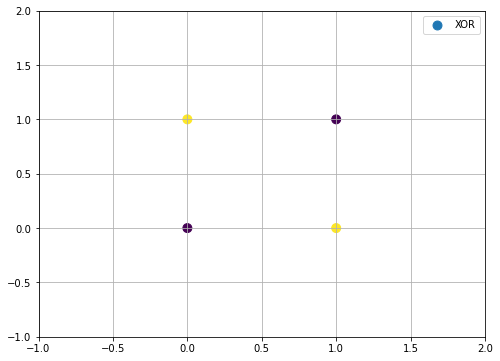

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(inputs[:,0], inputs[:,1], c=output, label='XOR', s=80)
plt.xlim(-1,2)
plt.ylim(-1,2)
plt.grid()
plt.legend()
plt.show()

In [17]:
weights, bias = p.train(inputs, output, n_iters=10)
preds = p.predict(inputs)
print("training accuracy: %.2f" %(100 - np.mean(np.abs(preds - output)) * 100))

[[0.60111501]
 [0.70807258]]
[1.52302986]
training accuracy: 50.00


In [18]:
preds

array([[1],
       [1],
       [1],
       [1]])

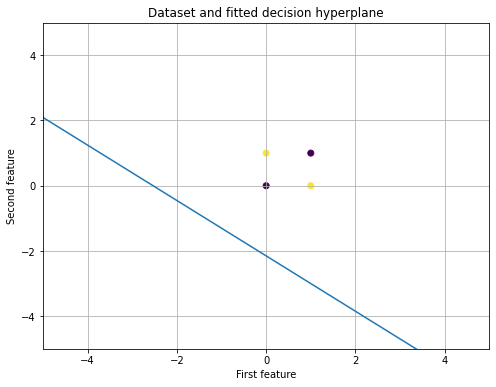

In [19]:
plot_hyperplane(inputs, output, weights, bias)

### 3. Вторая выборка для 4-х классов

In [20]:
X_train = np.array([
    [-4, -3.6],
    [-3.4, 1.2],
    [0.7, -4.5],
    [4.3, 2.2],
    [2.3, -4.4],
    [3.6, 4.3],
    [4.8, 3.5],
    [2.8, 0.1],
])
y_train = np.array([
    [0,1],
    [0,1],
    [0,0],
    [1,0],
    [0,0],
    [1,1],
    [1,0],
    [0,0],
])
label = np.array([0,0,1,2,1,3,2,1]).reshape(-1,1)

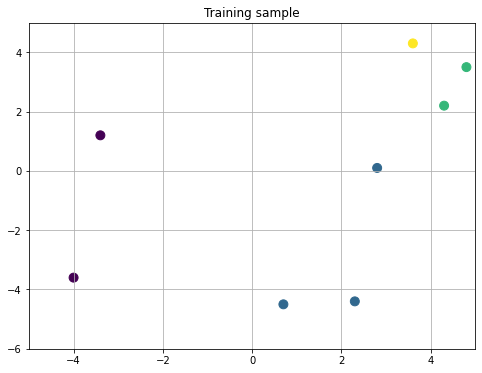

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(X_train[:,0], X_train[:,1], s=80, c=label)
plt.xlim(-5,5)
plt.ylim(-6,5)
plt.grid()
plt.title('Training sample')
plt.show()

In [22]:
p = Perceptron('hardline')
w, b = p.train(X_train, y_train)
preds = p.predict(X_train)
preds

[[0.02058449 0.96990985]
 [0.83244264 0.21233911]]
[-0.46341769 -0.46572975]


array([[0, 1],
       [0, 1],
       [0, 0],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [0, 0]])

In [23]:
y_train

array([[0, 1],
       [0, 1],
       [0, 0],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [0, 0]])

In [24]:
w

array([[ 1.02058449, -9.83009015],
       [ 7.23244264,  9.31233911]])

In [25]:
b

array([-5.46341769,  0.53427025])

### 3.5 Деление на классы и дискриминантные линии

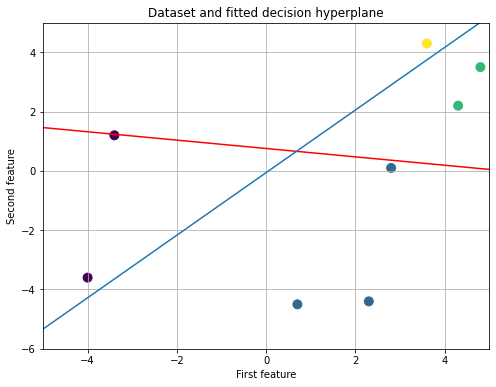

In [26]:
slope_1 = - w[0][0] / w[1][0]
slope_2 = - w[0][1] / w[1][1]
intercept_1 = - b[0] / w[1][0]
intercept_2 = - b[1] / w[1][1]
x_hyperplane = np.linspace(-10,10,10)
y_hyperplane_1 = slope_1 * x_hyperplane + intercept_1
y_hyperplane_2 = slope_2 * x_hyperplane + intercept_2
fig = plt.figure(figsize=(8,6))
plt.scatter(X_train[:,0], X_train[:,1], c=label, s=80)
plt.plot(x_hyperplane, y_hyperplane_1, '-', c='red')
plt.plot(x_hyperplane, y_hyperplane_2, '-')
plt.title("Dataset and fitted decision hyperplane")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.grid()
plt.xlim(-5,5)
plt.ylim(-6,5)
plt.show()

In [27]:
X_test = np.array([[ 3,  0],
       [-3,  2],
       [ 0,  3],
       [-3, -4]])
X_test

array([[ 3,  0],
       [-3,  2],
       [ 0,  3],
       [-3, -4]])

In [28]:
y_test_preds = p.predict(X_test)
print(y_test_preds)

[[0 0]
 [1 1]
 [1 1]
 [0 0]]


In [29]:
test_label = [1, 0, 0, 3]

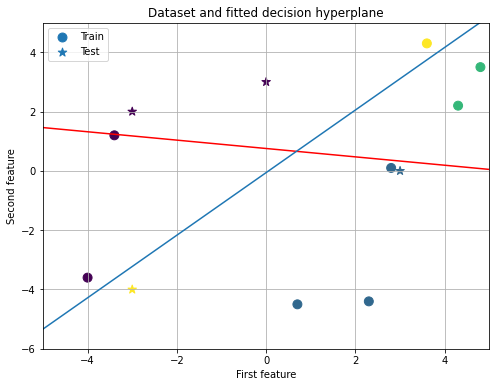

In [30]:
slope_1 = - w[0][0] / w[1][0]
slope_2 = - w[0][1] / w[1][1]
intercept_1 = - b[0] / w[1][0]
intercept_2 = - b[1] / w[1][1]
x_hyperplane = np.linspace(-10,10,10)
y_hyperplane_1 = slope_1 * x_hyperplane + intercept_1
y_hyperplane_2 = slope_2 * x_hyperplane + intercept_2
fig = plt.figure(figsize=(8,6))
plt.scatter(X_train[:,0], X_train[:,1], c=label, s=80, label='Train')
plt.scatter(X_test[:,0],  X_test[:,1],  c=test_label, s=80, marker='*', label='Test')
plt.plot(x_hyperplane, y_hyperplane_1, '-', c='red')
plt.plot(x_hyperplane, y_hyperplane_2, '-')
plt.title("Dataset and fitted decision hyperplane")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.grid()
plt.xlim(-5,5)
plt.ylim(-6,5)
plt.legend()
plt.show()